In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import os

tf.__version__


'2.10.0'

In [11]:
dataset_main = pd.read_csv("../Dataset/data_labels_mainData.csv")
dataset_extra = pd.read_csv("../Dataset/data_labels_extraData.csv")

In [12]:
dataset_main

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [18]:
dataset_main.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


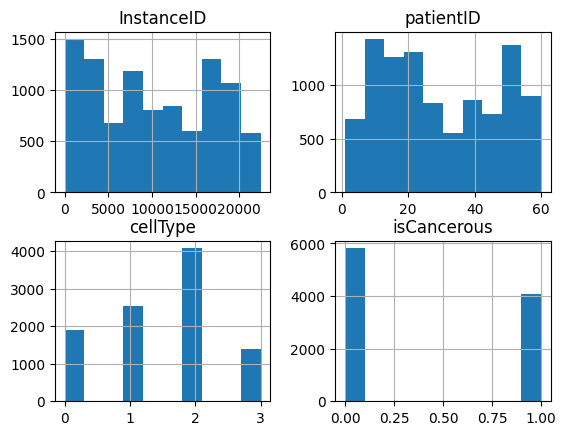

In [20]:
dataset_main.hist()
plt.show()

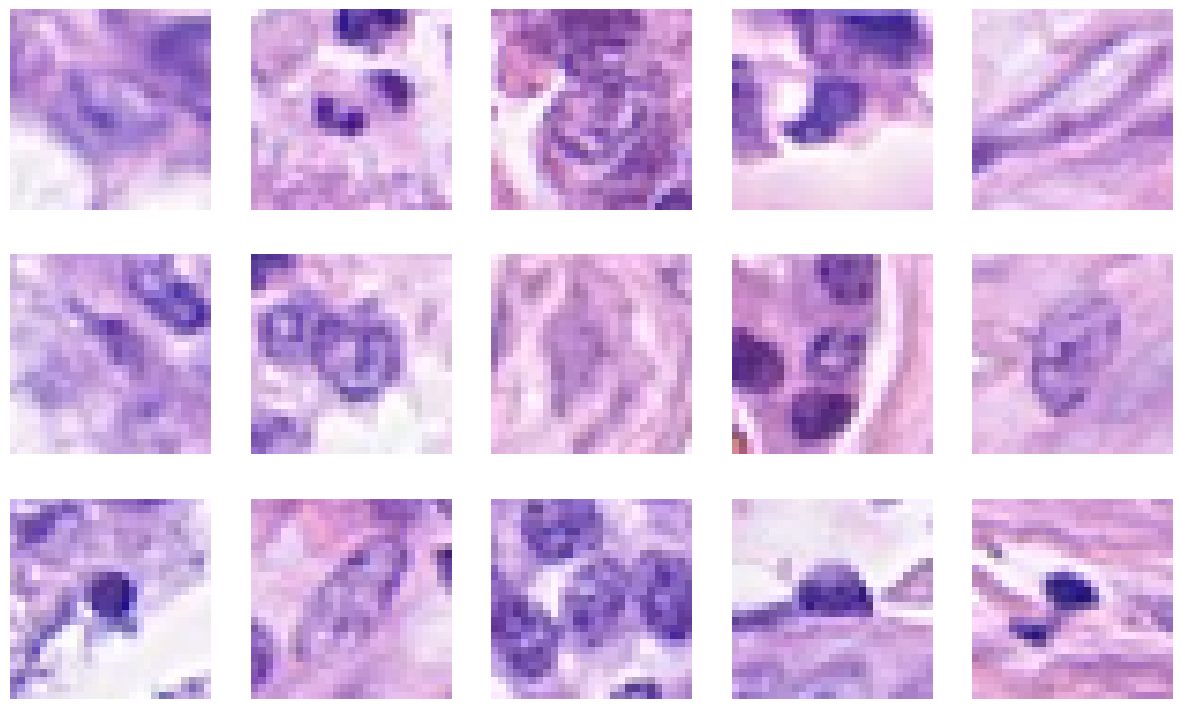

In [92]:
image_folder = "../Dataset/patch_images"
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]
rand_paths = np.random.choice(image_paths, 15)

plt.figure(figsize=(15,9))
for i, image_path in enumerate(rand_paths):
    im = np.asarray(Image.open(image_path))
    plt.subplot(3,5,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()